In [1]:
#Importing Libraries
import numpy as np # numpy
import pandas as pd # pandas

In [2]:
#Load datset into dataframe
train = pd.read_csv('../input/train.csv') # sample model based on sample
test = pd.read_csv('../input/test.csv') # predict the output based on sample

In [3]:
# to know the dataframe
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# goal is to find the survuval outcome of test

In [6]:
#Exploratory data Analysis
  #Explore the statistics of data given

In [7]:
#Number of Passengers 
print("Total number of passengers in training dataset",len(train))
print("Totalnumber of passengers who survived in training dataset",len(train[train["Survived"]==1]))

Total number of passengers in training dataset 891
Totalnumber of passengers who survived in training dataset 342


In [8]:
#Find the Number of men and women survived
men=len(train[(train["Survived"]==1)&(train["Sex"]=="male")])
women=len(train[(train["Survived"]==1) & (train["Sex"]=="female")])
print("Number of men survived",men)
print("Number of women survived",women)

Number of men survived 109
Number of women survived 233


In [9]:
#% of men and women who survived
print("% of men who survived",100*(men/(len(train[train["Sex"]=="male"]))))
print("% of women who survived",100*(women/(len(train[train["Sex"]=="female"]))))

% of men who survived 18.890814558058924
% of women who survived 74.20382165605095


In [10]:
# Find the number of 1st ,2nd,3rd class survivors
class1=len(train[(train["Survived"]==1)&(train["Pclass"]==1)])
class2=len(train[(train["Survived"]==1) & (train["Pclass"]==2)])
class3=len(train[(train["Survived"]==1)&(train["Pclass"]==3)])

In [11]:
#% of survivoras as per class1,class2,class3
print("% of Passengers who survived in class 1", 100*(class1/len(train[train["Pclass"]==1])))
print("% of Passengers who survived in class 2", 100*(class2/len(train[train["Pclass"]==2])))
print("% of Passengers who survived in class 3", 100*(class3/len(train[train["Pclass"]==3])))

% of Passengers who survived in class 1 62.96296296296296
% of Passengers who survived in class 2 47.28260869565217
% of Passengers who survived in class 3 24.236252545824847


In [12]:
#Find the number of children and adult survived
children=len(train[(train["Survived"]==1)&(train["Age"]<18)])
adult=len(train[(train["Survived"]==1)&(train["Age"]>18)])

In [13]:
#% of children and adult who survived
print("% of children who survived",100*(children/len(train[train["Age"]<18])))
print("% of adult who survived",100*(adult/len(train[train["Age"]>18])))

% of children who survived 53.98230088495575
% of adult who survived 38.26086956521739


In [14]:
#Data Preprocessing:
   #1.Only numeric values suitable for decision tree model, so replace male as 1 and female as 0
   #2.Omit irrelevant columns
   #3.replace the missing values in train dataset

In [15]:
#Encode the sex male as 1 and female as 0
train["Sex"] = train["Sex"].apply(lambda x: 1 if x=="male" else 0)
#Omit irrelevant columns such as port, cabin, Embarked, Ticket, Passenger-ID, Name
train = train[['Survived','Pclass','Sex','Age','SibSp','Parch','Fare']]
#Fill themissing values of Age and fare with mean value(any relevant values)
train["Age"] = train["Age"].fillna(np.mean(train["Age"]))
train["Fare"] = train["Fare"].fillna(np.mean(train["Fare"]))

In [16]:
# Building th model:
   #1.Labelling X and Y
   #2.predict the model=> split,train the model
   #3.Evaluate the model
   #4.Improve the model


In [17]:
#Label X & Y -  Y=>result column , X=>other columns
Y = train["Survived"]
X = train.drop("Survived",axis=1)

In [18]:
#Split the training dataset
#split train datset into 33% test data and remaining as training data 
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33,random_state=42)
#Train the model using decision tree classifier
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [19]:
#Evaluate the model built 
from sklearn.metrics import accuracy_score
print('Training accuracy...', accuracy_score(Y_train, classifier.predict(X_train)))
print('Validation accuracy', accuracy_score(Y_test, classifier.predict(X_test)))

Training accuracy... 0.9798657718120806
Validation accuracy 0.7491525423728813


In [20]:
#Improve the model => to reduce the difference in accuracy
classifier = DecisionTreeClassifier(max_depth = 3)
classifier.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [21]:
#Evaluate the model
print('Training accuracy...', accuracy_score(Y_train, classifier.predict(X_train)))
print('Validation accuracy', accuracy_score(Y_test, classifier.predict(X_test)))

Training accuracy... 0.8238255033557047
Validation accuracy 0.8203389830508474


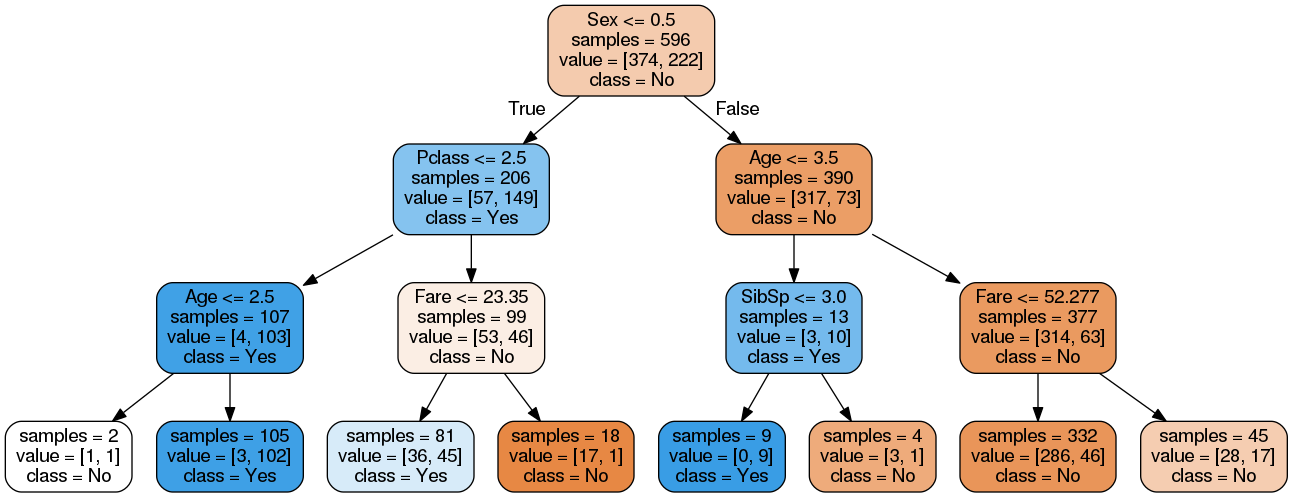

In [22]:
#Visualize the decision tree model
from sklearn import tree
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont

with open("tree1.dot", 'w') as f:
     f = tree.export_graphviz(classifier,
                              out_file=f,
                              impurity = False,
                              feature_names = X_test.columns.values,
                              class_names = ['No', 'Yes'],
                              rounded = True,
                              filled= True )
        
#Convert .dot to .png to allow display in web notebook
check_call(['dot','-Tpng','tree1.dot','-o','tree1.png'])

# Annotating chart with PIL
img = Image.open("tree1.png")
draw = ImageDraw.Draw(img)
img.save('sample-out.png')
PImage("sample-out.png")

In [23]:
#predict the outcome of test data
#Add the empty column to test data
test['Survived']=np.nan
#Create Input and output dataframe for decision tree model
Ip = test.drop('Survived',axis=1)
Op = test['Survived']
#Encode the sex 
Ip["Sex"] = Ip["Sex"].apply(lambda x: 1 if x=="male" else 0)
#Fill themissing values of Age and fare with mean value(any relevant values)
Ip["Age"] = Ip["Age"].fillna(np.mean(Ip["Age"]))
Ip["Fare"] = Ip["Fare"].fillna(np.mean(Ip["Fare"]))
#Omit the irrelevant columns
Ip = Ip[['Pclass','Sex','Age','SibSp','Parch','Fare']]
#Apply the test input data into model
Op = classifier.predict(Ip)

In [24]:
#Add the result to test data
test['Survived'] = Op
#Export the results in a file
results = test
results.to_csv('Results.csv',index=False)